In [2]:
%load_ext autoreload
%autoreload 2

# Exracting PPIs

In [38]:
from ppiref.extraction import PPIExtractor
from ppiref.definitions import PPIREF_TEST_DATA_DIR

# Initialize PPI extractor based on 10A contacts between heavy atoms (as in PPIRef)
# Additionally, caluclate buried surface area (BSA) of PPIs (slow)
ppi_dir = PPIREF_TEST_DATA_DIR / 'ppi_dir'
extractor = PPIExtractor(out_dir=ppi_dir, kind='heavy', radius=10., bsa=True)

# Extract all contact-based dimer PPIs from a PDB file
pdb_file = PPIREF_TEST_DATA_DIR / '1bui.pdb'
extractor.extract(pdb_file)

# Extract a contact-based PPI between two specified chains (dimer)
extractor.extract(pdb_file, partners=['A', 'C'])

# Extract a contact-based PPI between three specified chains (trimer)
extractor.extract(pdb_file, partners=['A', 'B', 'C'])

# Extract a complete complex by setting high expansion radius aroung interface
ppi_complexes_dir = PPIREF_TEST_DATA_DIR / 'ppi_dir_dimers'
extractor = PPIExtractor( out_dir=ppi_complexes_dir, kind='heavy', radius=6., bsa=False, expansion_radius=1_000_000)
extractor.extract(pdb_file, partners=['A', 'C'])


# Analysing PPIs

2024-01-22 20:34:13.910 Python[12058:158059] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


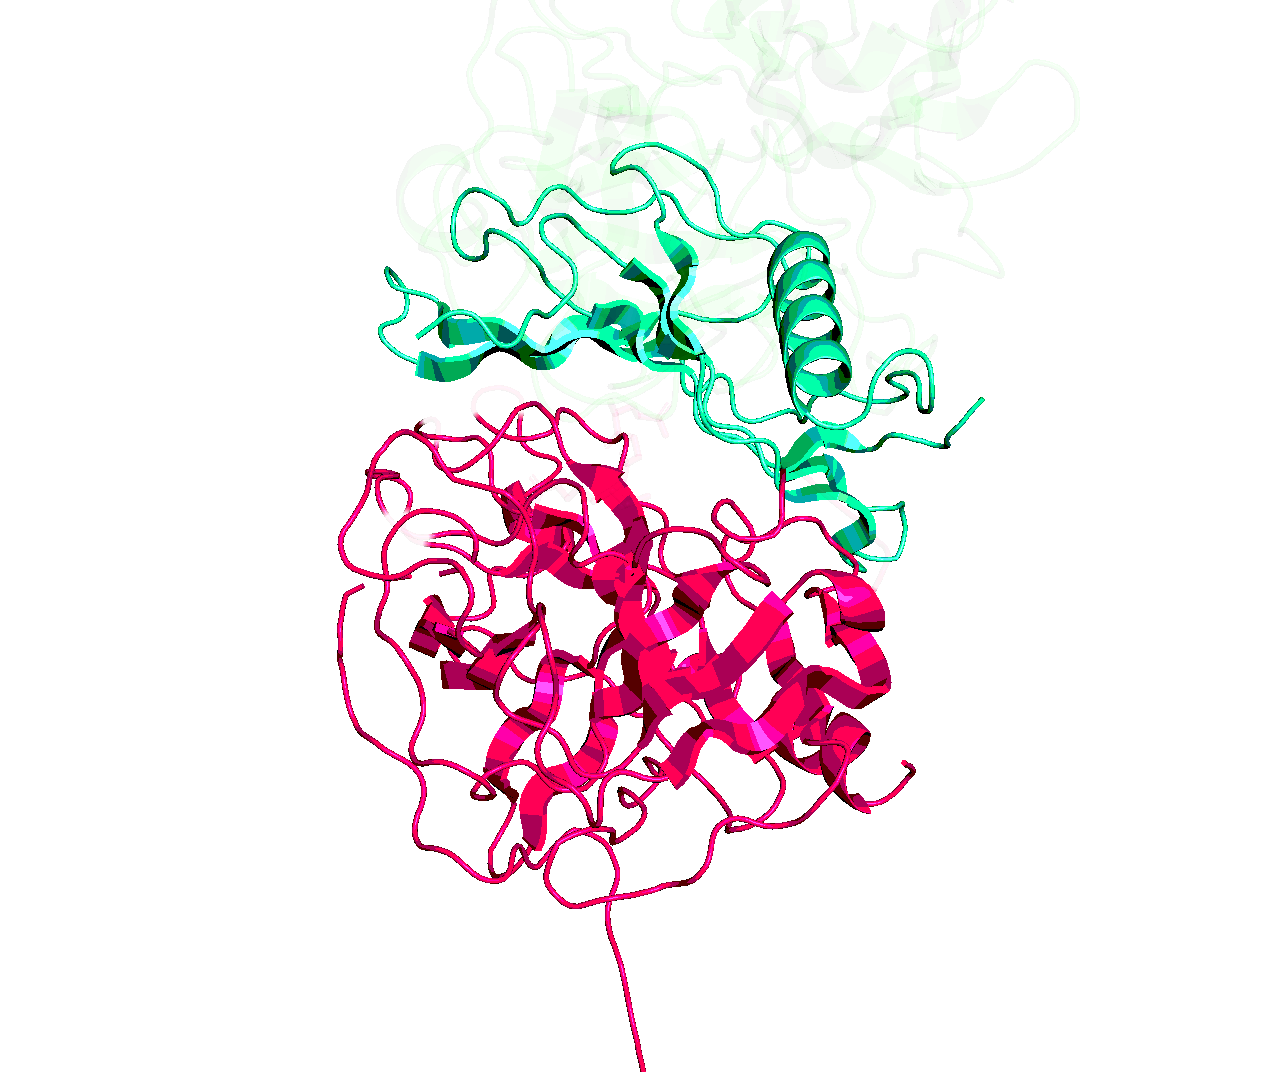

In [43]:
from ppiref.visualization import PyMOL

pymol = PyMOL()

# Visualize extracted PPIs in PyMOL session + static image
ppi_file = ppi_complexes_dir / 'bu/1bui_A_C.pdb'  # complex
pymol.display_ppi(ppi_file, sticks=False, letters=False, color_by_residues=False)

2024-01-22 20:36:28.675 Python[12110:159903] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


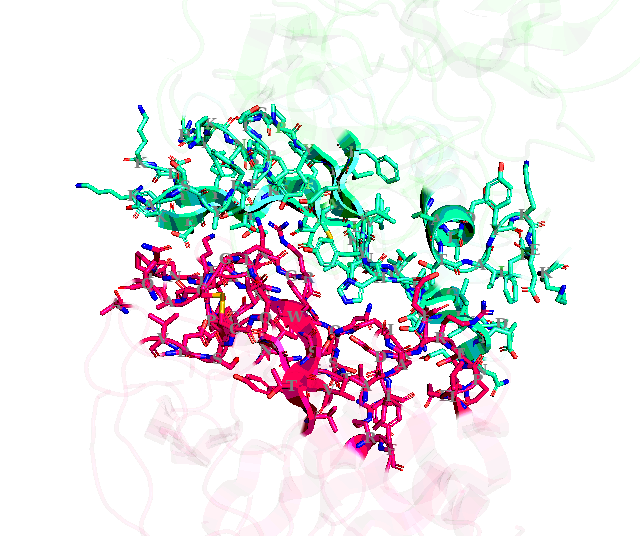

In [44]:
ppi_file = ppi_dir / 'bu/1bui_A_C.pdb'  # interface
pymol.display_ppi(ppi_file, sticks=True, letters=True, color_by_residues=False)

In [17]:
from ppiref.utils.ppi import PPI

# Get properties of a PPI
ppi = PPI(ppi_file)
ppi.stats

{'KIND': 'heavy',
 'EXTRACTION RADIUS': 10.0,
 'EXPANSION RADIUS': 0.0,
 'RESOLUTION': 2.65,
 'STRUCTURE METHOD': 'x-ray diffraction',
 'BSA': 898.378288445}

# Comparing PPIs

In [40]:
extractor = PPIExtractor(out_dir=ppi_dir, kind='heavy', radius=6., bsa=False)
extractor.extract(PPIREF_TEST_DATA_DIR / '1p7z.pdb', partners=['A', 'C'])
extractor.extract(PPIREF_TEST_DATA_DIR / '3p9r.pdb', partners=['B', 'D'])

In [17]:
from ppiref.comparison import IAlign, USalign, IDist

# Use different methods to compare two near-duplicate PPIs from
# Figure 1 in our paper (https://arxiv.org/pdf/2310.18515.pdf)
ppis = [PPIREF_TEST_DATA_DIR / '1p7z_A_C.pdb', PPIREF_TEST_DATA_DIR / '3p9r_B_D.pdb']

ialign = IAlign()
ialign.compare(*ppis)

# On Linux:
# {'PPI0': '1p7z_A_C', 'PPI1': '3p9r_B_D', 'IS-score': 0.95822, 'P-value': 8.22e-67, 'Z-score': 152.167, 'Number of aligned residues': 249, 'Number of aligned contacts': 347, 'RMSD': 0.37, 'Seq identity': 0.992}

perl /Users/anton/dev/PPIRef/external/ialign/bin/ialign.pl -a 2 -w iAlign_tmp_out_1p7z_A_C_3p9r_B_D -c1 AC -c2 BD /Users/anton/dev/PPIRef/tests/data/1p7z_A_C.pdb /Users/anton/dev/PPIRef/tests/data/3p9r_B_D.pdb > iAlign_tmp_out_1p7z_A_C_3p9r_B_D/1p7z_A_C_3p9r_B_D.out


{'PPI0': '1p7z_A_C', 'PPI1': '3p9r_B_D'}

In [18]:
usalign = USalign()
usalign.compare(*ppis)

# On Linux:
# {'PPI0': '1p7z_A_C', 'PPI1': '3p9r_B_D', 'TM1': 0.992, 'TM2': 0.9965, 'RMSD': 0.3, 'ID1': 0.991, 'ID2': 0.996, 'IDali': 0.998, 'L1': 448, 'L2': 446, 'Lali': 445}

/bin/sh: /Users/anton/dev/PPIRef/external/USalign/USalign: No such file or directory


CalledProcessError: Command '/Users/anton/dev/PPIRef/external/USalign/USalign /Users/anton/dev/PPIRef/tests/data/1p7z_A_C.pdb /Users/anton/dev/PPIRef/tests/data/3p9r_B_D.pdb -outfmt 2 -mm 1 -ter 1 ' returned non-zero exit status 127.

In [19]:
idist = IDist()
idist.compare(*ppis)

[01/22/24 20:10:41] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=570110;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=850055;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/graphs.py#187\187]8;;\

                    DEBUG    Detected 448 total nodes                                                 ]8;id=237215;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=726123;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/graphs.py#434\434]8;;\

                    INFO     Found: 200256 KNN edges                                               ]8;id=753976;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/edges/distance.py\distance.py]8;;\:]8;id=356307;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/edges/distance.py#1131\1131]8;;\

[01/22/24 20:10:44] INFO     Found: 200256 KNN edges                                               ]8;id=562396;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/edges/distance.py\distance.py]8;;\:]8;id=424701;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/edges/distance.py#1131\1131]8;;\

[01/22/24 20:10:47] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=238446;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=594170;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/graphs.py#187\187]8;;\

                    DEBUG    Detected 446 total nodes                                                 ]8;id=603875;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=664961;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/graphs.py#434\434]8;;\

                    INFO     Found: 198470 KNN edges                                               ]8;id=225896;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/edges/distance.py\distance.py]8;;\:]8;id=509743;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/edges/distance.py#1131\1131]8;;\

[01/22/24 20:10:50] INFO     Found: 198470 KNN edges                                               ]8;id=792222;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/edges/distance.py\distance.py]8;;\:]8;id=803333;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/edges/distance.py#1131\1131]8;;\

{'PPI0': '1p7z_A_C.pdb',
 'PPI1': '3p9r_B_D.pdb',
 'L2': 0.0026614179313795114,
 'L1': 0.006036636849518753,
 'Cosine Similarity': 0.999777940667365}

In [23]:
idist.embed(ppis[0])
idist.embed(ppis[1])
idist.embeddings

[01/22/24 20:12:14] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=868213;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=779056;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/graphs.py#187\187]8;;\

                    DEBUG    Detected 448 total nodes                                                 ]8;id=341644;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=111629;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/graphs.py#434\434]8;;\

                    INFO     Found: 200256 KNN edges                                               ]8;id=584229;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/edges/distance.py\distance.py]8;;\:]8;id=375593;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/edges/distance.py#1131\1131]8;;\

[01/22/24 20:12:17] INFO     Found: 200256 KNN edges                                               ]8;id=785808;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/edges/distance.py\distance.py]8;;\:]8;id=219499;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/edges/distance.py#1131\1131]8;;\

{'3p9r_B_D': array([0.02247098, 0.00224901, 0.03596857, 0.03821186, 0.03148652,
        0.0404701 , 0.02247443, 0.02697991, 0.01798007, 0.03372832,
        0.0044929 , 0.0382254 , 0.04607898, 0.01573758, 0.03933556,
        0.0247265 , 0.0314755 , 0.01123243, 0.00449045, 0.01348696]),
 '1p7z_A_C': array([0.02237079, 0.00223889, 0.03804226, 0.0391576 , 0.03134589,
        0.04028928, 0.02237348, 0.02685891, 0.01789972, 0.03357791,
        0.00447256, 0.0380533 , 0.04587724, 0.01566676, 0.03804791,
        0.02461776, 0.0313348 , 0.01118212, 0.00447062, 0.01342645])}

In [21]:
idist.deduplicate_embeddings()
idist.embeddings

Processing adjacency chunks: 100%|██████████| 1/1 [00:00<00:00, 66.15it/s]


{'3p9r_B_D': array([0.02247098, 0.00224901, 0.03596857, 0.03821186, 0.03148652,
        0.0404701 , 0.02247443, 0.02697991, 0.01798007, 0.03372832,
        0.0044929 , 0.0382254 , 0.04607898, 0.01573758, 0.03933556,
        0.0247265 , 0.0314755 , 0.01123243, 0.00449045, 0.01348696])}

In [25]:
idist.embed(ppis[1])
idist.query(idist.embeddings['1p7z_A_C'])

(array([2.63417803e-09, 2.66141793e-03]),
 array(['1p7z_A_C', '3p9r_B_D'], dtype=object))

In [28]:
print(idist.compare_all_against_all(ppis, ppis))

/Users/anton/dev/PPIRef/ppiref/comparison.py:78: UserWarning: Current implementation of parallelization uses `executor.map`. Therefore tqdm progress bar only shows 0\% and 100\%.
  warnings.warn(
Embedding PPIs (8 processes):   0%|          | 0/2 [00:00<?, ?it/s]

[01/22/24 20:14:28] WARNING  To use the Graphein submodule      ]8;id=168006;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/features/sequence/embeddings.py\embeddings.py]8;;\:]8;id=9246;file:///Users/anton/miniconda3/envs/ppiformer_u/lib/python3.9/site-packages/graphein/protein/features/sequence/embeddings.py#44\44]8;;\
                             graphein.protein.features.sequence                 
                             .embeddings, you need to install:                  
                             biovec                                             
                             biovec cannot be installed via                     
                             conda                                              
                             Alternatively, you can install                     
                             graphein with the extras:                          
                                                         

Embedding PPIs (8 processes): 100%|██████████| 2/2 [00:14<00:00,  7.01s/it]

           PPI0          PPI1        L2        L1  Cosine Similarity
0  1p7z_A_C.pdb  1p7z_A_C.pdb  0.000000  0.000000           1.000000
1  1p7z_A_C.pdb  3p9r_B_D.pdb  0.002661  0.006037           0.999778
2  3p9r_B_D.pdb  1p7z_A_C.pdb  0.002661  0.006037           0.999778
3  3p9r_B_D.pdb  3p9r_B_D.pdb  0.000000  0.000000           1.000000


# Splitting PPIs

In [45]:
from ppiref.split import read_split

split = read_split('dips_equidock', full_paths=False)
split['train'][:3]

['1v6j_A_D', '2v6a_L_A', '2v6a_B_O']

In [46]:
split = read_split('skempi2_iclr24_split', full_paths=False)
split['test'][:3]

['1B3S_A_D', '1B2U_A_D', '1BRS_A_D']

In [42]:
from ppiref.split import write_split

split = {'train': ['1p7z_A_C'], 'test': ['3p9r_B_D', '1p7z_A_C']}
write_split('demo_split', source=PPIREF_TEST_DATA_DIR / 'ppi_dir', folds=split)

/Users/anton/dev/PPIRef/ppiref/split.py:49: UserWarning: Folds train and test are not disjoint.
  warnings.warn(f'Folds {fold_a} and {fold_b} are not disjoint.')
/Users/anton/dev/PPIRef/ppiref/split.py:55: UserWarning: Split is not complete: 2 of 5 PPIs contained.
  warnings.warn(


In [48]:
split = read_split('ppiref_filtered_clustered_04', full_paths=False)
split['whole'][:3]

['4q2p_A_B', '2q2g_A_B', '6q2a_H_K']